## Compute Elementray Flux Mode

In this section, we study a minimal self-assembly model to demonstrate the application of our thermodynamic constrains to CRNs that also encompass the presence of molecular complexes in the form of a non-reducible hypergraph.
As illustrated in Fig.~\ref{fig:self_assembly}a with black hyperedges, the CRNs consists of a monomer $X_1$ that can form dimers $X_2$ through reaction 1, and a dimer $X_2$ and monomer $X_1$ can associate to form a trimers $X_3$, and a trimer $X_3$ can dissociate to three monomers $X_1$. 
The proposed model is composed of three reactions: a fuel-to-waste conversion driving the dimer formation, a spontaneous association of a dimer and a monomer to form a trimer, and the spontaneous disassembly from a trimer to three monomers. Here, the fuel $F$ and the waste $W$ are treated as chemostatted external species, keeping the system out of equilibrium. The detailed reaction scheme is illustrated in Eq.~\eqref{eq:self_assembly_reac}, together with the stoichiometric matrix, while the corresponding reaction hypergraph is represented in Fig.~\ref{fig:self_assembly}a with black hyperedges.
\begin{equation}
    \begin{aligned}
      \boxed{1}\  &F+ 2 X_1\xrightleftharpoons[k_1^-]{k_1^+} X_2 +W,\\
       \boxed{2}\ &X_1 + X_2\xrightleftharpoons[k_2^-]{k_2^+} X_3,\\
       \boxed{3}\  &X_3\xrightleftharpoons[k_3^-]{k_3^+} 3X_1.\\
    \end{aligned}
        \mathbb{S}   
      =\left[
  \begin{array}{ccc}
    -2&-1&3 \\
    1&-1&0\\
    0&1&-1 \\
    \hline 
    -1 & 0 &0\\
    1 & 0 &0\\
  \end{array}
\right]
  \begin{array}{c}
    X_1 \\
    X_2\\
    X_3 \\
    \hline 
    F\\
    W\\
  \end{array}
\end{equation}
For this self-assembly CRN, there is one EFM, $\bm{e} = [1,1,1]^T$
in the reaction hypergraph and its cycle affinity $A_{\bm{e}_1} = \mu_F-\mu_W = \Delta\mu>0$ since it stems from the fuel-to-waste driven dimer formation. We further assume that this chemical potential difference is strictly positive in the model. This cycle affinity bounds the affinity of all three reactions by means of Eq.~\eqref{eq:affinity_bound_1}
\begin{equation}
   0\leq A_\rho^{\rm ss} \leq \Delta\mu, \text{ for $\rho = 1,2,3$}.
\end{equation}
Using Eq.~\eqref{eq:eq_constant_bound},  we can also bound the concentration ratios of internal species involved in these three reactions
\begin{equation}
    \begin{aligned}
    e^{-\frac{\mu_{2}^{\circ}-2\mu_{1}^{\circ}}{RT}} \leq 
    &\frac{x_2^{\rm ss}}{(x_1^{\rm ss})^2}
    \leq  e^{-\frac{\mu_{2}^{\circ}-2\mu_{1}^{\circ}-\Delta\mu}{RT} }\\ 
 e^{-\frac{\mu_{3}^{\circ}-\mu_{2}^{\circ}-\mu_{1}^{\circ}+\Delta \mu}{RT} }    \leq 
 &\frac{x_3^{\rm ss}}{x_1^{\rm ss}x_2^{\rm ss}}
 \leq  e^{-\frac{\mu_{3}^{\circ}-\mu_{2}^{\circ}-\mu_{1}^{\circ}}{RT} } \\
  e^{-\frac{\mu_{3}^{\circ}-3\mu_{1}^{\circ}+\Delta\mu}{RT} }  \leq 
  &\frac{(x_1^{\rm ss})^3}{x_3^{\rm ss}}
  \leq e^{-\frac{\mu_{3}^{\circ}-3\mu_{1}^{\circ}}{RT} }  \\
    \end{aligned}
\end{equation}
where we use $\mu_1^{\circ}$, $\mu_2^{\circ}$, and $\mu_3^{\circ}$ to denote the standard chemical potential of internal species $X_1$, $X_2$ and $X_3$, respectively. The constraints on concentrations define the thermodynamic space illustrated in Fig.~\ref{fig:self_assembly}d.

From the right nullspace of $(\mathbb{S}_X)^T$, we can extract one elementary conservation law (ECL)
\begin{equation}
    \bm{r} = [1,2,3]^T
\end{equation}
such that we have the following conservated quantity
\begin{equation}
    \begin{aligned}
        x_1+2x_2+3x_3 =\text{constant}.
    \end{aligned}
\end{equation}

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve

plt.rcParams.update({'font.size': 13})
plt.rcParams["text.usetex"] = False

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


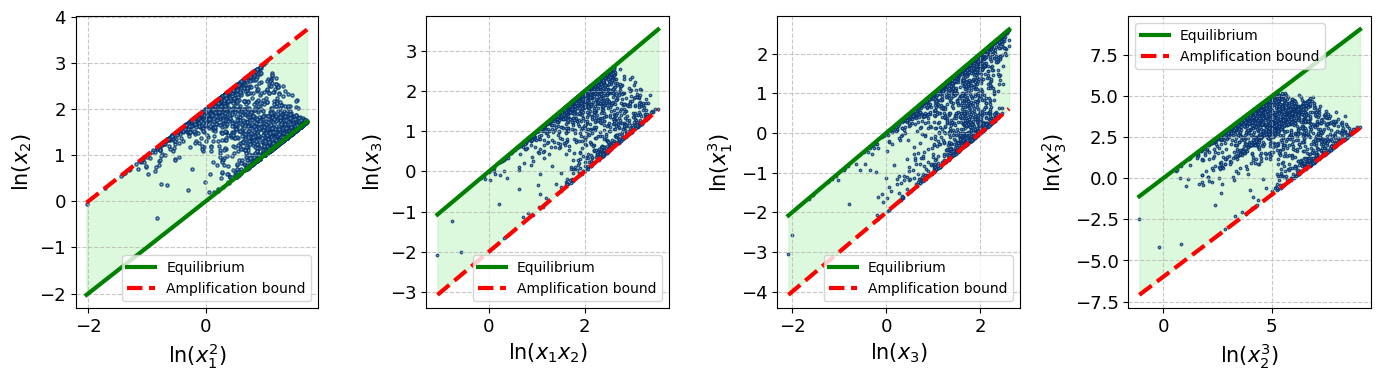

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve

# Define system parameters
RT = 1.0  # R*T in consistent units
Delta_mu = 2.0  # Chemical potential difference, positive
mu1_std = 0 # Standard chemical potential for X1 (reference)
mu2_std = 0  # Standard chemical potential for X2
mu3_std = 0  # Standard chemical potential for X3

# Generate multiple initial conditions
n_initial = 2000
initial_conditions = []
steady_states = []
t_span = (0, 2000)

for _ in range(n_initial):
    # Generate random rate constants for each trajectory
    k1f = 10**np.random.uniform(-2, 3)  # Random from 10^-3 to 10^3
    k2f = 10**np.random.uniform(-2, 3)  # Random from 10^-3 to 10^3
    k3f = 10**np.random.uniform(-2, 3)  # Random from 10^-3 to 10^3

    # Backward rates determined by thermodynamics
    k1b = k1f * np.exp((mu2_std - 2*mu1_std - Delta_mu)/RT)  # Changed sign
    k2b = k2f * np.exp((mu3_std - mu2_std - mu1_std)/RT)  # Changed sign
    k3b = k3f * np.exp((mu3_std - 3*mu1_std)/RT)  # Changed sign
    
    # Random initial condition
    x0 = np.random.uniform(0.1, 10, 3)#[1,1,1]#np.random.uniform(.1, 10, 3)
    initial_conditions.append(x0)

    def reaction_system(t, x):
        x1, x2, x3 = x
        
        # Reaction rates
        r1 = k1f*x1**2 - k1b*x2
        r2 = k2f*x1*x2 - k2b*x3
        r3 = k3f*x1**3 - k3b*x3
        
        # ODEs
        dx1dt = -2*r1 - r2 - 3*r3
        dx2dt = r1 - r2
        dx3dt = r2 + r3
        
        return [dx1dt, dx2dt, dx3dt]

    sol = solve_ivp(reaction_system, t_span, x0, method='BDF')
    steady_state = sol.y[:,-1]
    steady_states.append(steady_state)

steady_states = np.array(steady_states)
# Create scatter plots
plt.figure(figsize=(14,4))

# First subplot
plt.subplot(141)
plt.grid(True, linestyle='--', alpha=0.7)
x_range = np.exp(np.linspace(np.log(min(steady_states[:,0]**2)), np.log(max(steady_states[:,0]**2)), 100))
plt.fill_between(np.log(x_range), np.log(x_range) + (mu2_std - 2*mu1_std)/RT, np.log(x_range*np.exp(Delta_mu/RT)) + (mu2_std - 2*mu1_std)/RT, color='#90EE90', alpha=0.3)
plt.scatter(np.log(steady_states[:,0]**2), np.log(steady_states[:,1]), edgecolors='#08306b',c='#6baed6',alpha=.8,s=5,rasterized=True)
plt.plot(np.log(x_range), np.log(x_range) + (mu2_std - 2*mu1_std)/RT, 'g', label='Equilibrium',linewidth=3)
plt.plot(np.log(x_range), np.log(x_range*np.exp(Delta_mu/RT)) + (mu2_std - 2*mu1_std)/RT, 'r--', label='Amplification bound',linewidth=3)
plt.legend(fontsize=10)
plt.xlabel('ln$(x_1^2)$',fontsize=15)
plt.ylabel('ln$(x_2)$',fontsize=15)


# Third subplot
plt.subplot(142)
plt.grid(True, linestyle='--', alpha=0.7)
x_range = np.exp(np.linspace(np.log(min(steady_states[:,0]*steady_states[:,1])), np.log(max(steady_states[:,0]*steady_states[:,1])), 100))
plt.fill_between(np.log(x_range), np.log(x_range) + (mu3_std - mu2_std - mu1_std)/RT, np.log(x_range*np.exp(-Delta_mu/RT)) + (mu3_std - mu2_std - mu1_std)/RT, color='#90EE90', alpha=0.3)
plt.scatter(np.log(steady_states[:,0]*steady_states[:,1]), np.log(steady_states[:,2]), edgecolors='#08306b',c='#6baed6',alpha=.8,s=3,rasterized=True)
plt.plot(np.log(x_range), np.log(x_range) + (mu3_std - mu2_std - mu1_std)/RT, 'g', label='Equilibrium',linewidth=3)
plt.plot(np.log(x_range), np.log(x_range*np.exp(-Delta_mu/RT)) + (mu3_std - mu2_std - mu1_std)/RT, 'r--', label='Amplification bound',linewidth=3)
plt.legend(fontsize=10)
plt.xlabel('ln$(x_1x_2)$',fontsize=15)
plt.ylabel('ln$(x_3)$',fontsize=15)

# Fourth subplot
plt.subplot(143)
plt.grid(True, linestyle='--', alpha=0.7)
x_range = np.exp(np.linspace(np.log(min(steady_states[:,2])), np.log(max(steady_states[:,2])), 100))
plt.fill_between(np.log(x_range), np.log(x_range) + (3*mu1_std - mu3_std)/RT, np.log(x_range*np.exp(-Delta_mu/RT)) + (3*mu1_std - mu3_std)/RT, color='#90EE90', alpha=0.3)
plt.scatter(np.log(steady_states[:,2]), np.log(steady_states[:,0]**3), edgecolors='#08306b',c='#6baed6',alpha=.8,s=3,rasterized=True)
plt.plot(np.log(x_range), np.log(x_range) + (3*mu1_std - mu3_std)/RT, 'g', label='Equilibrium',linewidth=3)
plt.plot(np.log(x_range), np.log(x_range*np.exp(-Delta_mu/RT)) + (3*mu1_std - mu3_std)/RT, 'r--', label='Amplification bound',linewidth=3)
plt.legend(fontsize=10)
plt.xlabel('ln$(x_3)$',fontsize=15)
plt.ylabel('ln$(x_1^3)$',fontsize=15)


# Second subplot
plt.subplot(144)
x_range = np.exp(np.linspace(np.log(min(steady_states[:,1]**3)), np.log(max(steady_states[:,1]**3)), 100))
plt.grid(True, linestyle='--', alpha=0.7)
plt.fill_between(np.log(x_range), np.log(x_range) + (2*mu3_std - 3*mu2_std)/RT, np.log(x_range*np.exp(-3*Delta_mu/RT)) + (2*mu3_std - 3*mu2_std)/RT, color='#90EE90', alpha=0.3)
plt.scatter(np.log(steady_states[:,1]**3), np.log(steady_states[:,2]**2), edgecolors='#08306b',c='#6baed6',alpha=.8,s=3,rasterized=True)
plt.plot(np.log(x_range), np.log(x_range) + (2*mu3_std - 3*mu2_std)/RT, 'g', label='Equilibrium',linewidth=3)
plt.plot(np.log(x_range), np.log(x_range*np.exp(-3*Delta_mu/RT)) + (2*mu3_std - 3*mu2_std)/RT, 'r--', label='Amplification bound',linewidth=3)
plt.legend(fontsize=10)
plt.xlabel('ln$(x_2^3)$',fontsize=15)
plt.ylabel('ln$(x_3^2)$',fontsize=15)

plt.tight_layout()
plt.savefig('self_bound.svg')
plt.show()
